# Setup for Notebook

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, scheduler, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, )

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x10c411ef0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x10c40d908>)


In [5]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRuleWithWeightDecay, GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import ConstantLearningRateScheduler
from mlp.penalties import L2Penalty

# Do Experiment

Epoch 1: 7.0s to complete
    error(train)=3.88e+00, acc(train)=3.03e-02, error(valid)=3.88e+00, acc(valid)=2.93e-02


Epoch 2: 7.2s to complete
    error(train)=3.87e+00, acc(train)=3.04e-02, error(valid)=3.87e+00, acc(valid)=2.93e-02


Epoch 3: 6.2s to complete
    error(train)=3.87e+00, acc(train)=3.04e-02, error(valid)=3.87e+00, acc(valid)=2.93e-02


Epoch 4: 6.8s to complete
    error(train)=3.86e+00, acc(train)=3.04e-02, error(valid)=3.86e+00, acc(valid)=2.93e-02


Epoch 5: 6.1s to complete
    error(train)=3.86e+00, acc(train)=3.04e-02, error(valid)=3.86e+00, acc(valid)=2.93e-02


Epoch 6: 5.7s to complete
    error(train)=3.86e+00, acc(train)=3.03e-02, error(valid)=3.86e+00, acc(valid)=2.93e-02


Epoch 7: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 8: 5.6s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 9: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 10: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 11: 5.9s to complete
    error(train)=3.85e+00, acc(train)=3.03e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 12: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.03e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 13: 5.6s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 14: 5.5s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 15: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 16: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 17: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 18: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 19: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 20: 5.5s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 21: 5.6s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 22: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 23: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 24: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 25: 5.6s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 26: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 27: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 28: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 29: 5.6s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 30: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 31: 5.9s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 32: 5.4s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 33: 5.6s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 34: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 35: 5.9s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 36: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 37: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 38: 5.6s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 39: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 40: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 41: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 42: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 43: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 44: 5.5s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 45: 5.5s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 46: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 47: 5.9s to complete
    error(train)=3.85e+00, acc(train)=3.03e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 48: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 49: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.03e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 50: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.03e-02, error(valid)=3.85e+00, acc(valid)=2.90e-02


Epoch 51: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 52: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.03e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 53: 5.9s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 54: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 55: 5.9s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 56: 5.5s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.90e-02


Epoch 57: 5.5s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 58: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.05e-02, error(valid)=3.85e+00, acc(valid)=2.90e-02


Epoch 59: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.88e-02


Epoch 60: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.87e-02


Epoch 61: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.86e-02


Epoch 62: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.03e-02, error(valid)=3.85e+00, acc(valid)=2.85e-02


Epoch 63: 5.6s to complete
    error(train)=3.85e+00, acc(train)=3.03e-02, error(valid)=3.85e+00, acc(valid)=2.87e-02


Epoch 64: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.03e-02, error(valid)=3.85e+00, acc(valid)=2.92e-02


Epoch 65: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.03e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 66: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.03e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 67: 6.1s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 68: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.03e-02, error(valid)=3.85e+00, acc(valid)=2.90e-02


Epoch 69: 5.5s to complete
    error(train)=3.85e+00, acc(train)=3.03e-02, error(valid)=3.85e+00, acc(valid)=2.89e-02


Epoch 70: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.01e-02, error(valid)=3.85e+00, acc(valid)=2.91e-02


Epoch 71: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.02e-02, error(valid)=3.85e+00, acc(valid)=2.89e-02


Epoch 72: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.02e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 73: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.96e-02


Epoch 74: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.93e-02


Epoch 75: 5.5s to complete
    error(train)=3.85e+00, acc(train)=3.04e-02, error(valid)=3.85e+00, acc(valid)=2.97e-02


Epoch 76: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.02e-02, error(valid)=3.85e+00, acc(valid)=2.95e-02


Epoch 77: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.01e-02, error(valid)=3.85e+00, acc(valid)=2.94e-02


Epoch 78: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.05e-02, error(valid)=3.85e+00, acc(valid)=3.01e-02


Epoch 79: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.06e-02, error(valid)=3.85e+00, acc(valid)=3.09e-02


Epoch 80: 5.6s to complete
    error(train)=3.85e+00, acc(train)=3.10e-02, error(valid)=3.85e+00, acc(valid)=3.15e-02


Epoch 81: 5.6s to complete
    error(train)=3.85e+00, acc(train)=3.18e-02, error(valid)=3.85e+00, acc(valid)=3.18e-02


Epoch 82: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.21e-02, error(valid)=3.85e+00, acc(valid)=3.31e-02


Epoch 83: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.22e-02, error(valid)=3.85e+00, acc(valid)=3.34e-02


Epoch 84: 5.9s to complete
    error(train)=3.85e+00, acc(train)=3.30e-02, error(valid)=3.85e+00, acc(valid)=3.40e-02


Epoch 85: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.33e-02, error(valid)=3.85e+00, acc(valid)=3.49e-02


Epoch 86: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.39e-02, error(valid)=3.85e+00, acc(valid)=3.49e-02


Epoch 87: 5.5s to complete
    error(train)=3.85e+00, acc(train)=3.44e-02, error(valid)=3.85e+00, acc(valid)=3.52e-02


Epoch 88: 5.6s to complete
    error(train)=3.85e+00, acc(train)=3.48e-02, error(valid)=3.85e+00, acc(valid)=3.55e-02


Epoch 89: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.49e-02, error(valid)=3.85e+00, acc(valid)=3.56e-02


Epoch 90: 6.2s to complete
    error(train)=3.85e+00, acc(train)=3.49e-02, error(valid)=3.85e+00, acc(valid)=3.54e-02


Epoch 91: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.50e-02, error(valid)=3.85e+00, acc(valid)=3.51e-02


Epoch 92: 969.3s to complete
    error(train)=3.85e+00, acc(train)=3.49e-02, error(valid)=3.85e+00, acc(valid)=3.55e-02


Epoch 93: 8.5s to complete
    error(train)=3.85e+00, acc(train)=3.50e-02, error(valid)=3.85e+00, acc(valid)=3.53e-02


Epoch 94: 9.8s to complete
    error(train)=3.85e+00, acc(train)=3.48e-02, error(valid)=3.85e+00, acc(valid)=3.51e-02


Epoch 95: 6.4s to complete
    error(train)=3.85e+00, acc(train)=3.49e-02, error(valid)=3.85e+00, acc(valid)=3.51e-02


Epoch 96: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.49e-02, error(valid)=3.85e+00, acc(valid)=3.49e-02


Epoch 97: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.50e-02, error(valid)=3.85e+00, acc(valid)=3.46e-02


Epoch 98: 5.7s to complete
    error(train)=3.85e+00, acc(train)=3.50e-02, error(valid)=3.85e+00, acc(valid)=3.47e-02


Epoch 99: 5.9s to complete
    error(train)=3.85e+00, acc(train)=3.52e-02, error(valid)=3.85e+00, acc(valid)=3.47e-02


Epoch 100: 5.8s to complete
    error(train)=3.85e+00, acc(train)=3.51e-02, error(valid)=3.85e+00, acc(valid)=3.46e-02



--------------------------------------------------------------------------------
weight_decay=0.00
--------------------------------------------------------------------------------


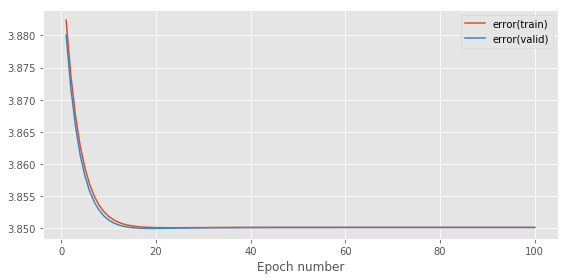

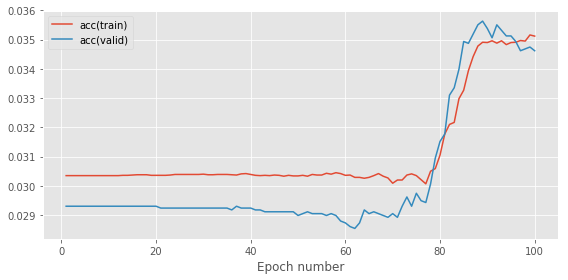

    final error(train) = 3.85e+00
    final error(valid) = 3.85e+00
    final acc(train)   = 3.51e-02
    final acc(valid)   = 3.46e-02
    run time per epoch = 17.23


Epoch 1: 5.9s to complete
    error(train)=3.87e+00, acc(train)=2.28e-02, error(valid)=3.87e+00, acc(valid)=2.26e-02


Epoch 2: 6.0s to complete
    error(train)=3.87e+00, acc(train)=2.28e-02, error(valid)=3.87e+00, acc(valid)=2.26e-02


Epoch 3: 5.9s to complete
    error(train)=3.87e+00, acc(train)=2.28e-02, error(valid)=3.87e+00, acc(valid)=2.26e-02


Epoch 4: 5.7s to complete
    error(train)=3.87e+00, acc(train)=2.28e-02, error(valid)=3.87e+00, acc(valid)=2.26e-02


Epoch 5: 5.9s to complete
    error(train)=3.87e+00, acc(train)=2.28e-02, error(valid)=3.87e+00, acc(valid)=2.26e-02


Epoch 6: 5.9s to complete
    error(train)=3.87e+00, acc(train)=2.28e-02, error(valid)=3.87e+00, acc(valid)=2.26e-02


Epoch 7: 5.8s to complete
    error(train)=3.87e+00, acc(train)=2.28e-02, error(valid)=3.86e+00, acc(valid)=2.26e-02


Epoch 8: 5.9s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.86e+00, acc(valid)=2.26e-02


Epoch 9: 5.8s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.86e+00, acc(valid)=2.26e-02


Epoch 10: 5.6s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.86e+00, acc(valid)=2.26e-02


Epoch 11: 6.7s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.86e+00, acc(valid)=2.26e-02


Epoch 12: 6.2s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.86e+00, acc(valid)=2.27e-02


Epoch 13: 5.9s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.86e+00, acc(valid)=2.27e-02


Epoch 14: 6.0s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.86e+00, acc(valid)=2.27e-02


Epoch 15: 6.1s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.86e+00, acc(valid)=2.27e-02


Epoch 16: 6.2s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.86e+00, acc(valid)=2.27e-02


Epoch 17: 6.0s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.86e+00, acc(valid)=2.27e-02


Epoch 18: 6.1s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.86e+00, acc(valid)=2.27e-02


Epoch 19: 6.1s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.86e+00, acc(valid)=2.27e-02


Epoch 20: 6.1s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.86e+00, acc(valid)=2.27e-02


Epoch 21: 6.6s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 22: 6.2s to complete
    error(train)=3.86e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 23: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 24: 12.6s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 25: 15.2s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 26: 14.9s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 27: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 28: 13.6s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 29: 8.8s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 30: 9.7s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 31: 8.8s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 32: 8.7s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 33: 9.2s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 34: 8.9s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 35: 9.4s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 36: 9.1s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 37: 8.4s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 38: 9.2s to complete
    error(train)=3.85e+00, acc(train)=2.28e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 39: 9.2s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


Epoch 40: 8.8s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


Epoch 41: 9.3s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.26e-02


Epoch 42: 8.7s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 43: 9.0s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 44: 9.0s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 45: 9.2s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 46: 9.1s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 47: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 48: 8.9s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 49: 8.9s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 50: 9.3s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 51: 10.5s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 52: 8.7s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 53: 9.3s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 54: 16.5s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 55: 18.5s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 56: 7.6s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 57: 9.0s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 58: 7.7s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 59: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 60: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 61: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 62: 5.8s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 63: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 64: 8.5s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 65: 7.7s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 66: 12.8s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 67: 9.3s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 68: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 69: 6.3s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 70: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 71: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 72: 7.7s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 73: 6.9s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 74: 7.4s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 75: 8.9s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 76: 7.9s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 77: 10.3s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 78: 7.0s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 79: 3.2s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 80: 12.1s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 81: 8.0s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 82: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 83: 7.7s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.27e-02


Epoch 84: 7.4s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 85: 7.0s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 86: 6.4s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 87: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 88: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02


Epoch 89: 8.6s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.29e-02


Epoch 90: 10.3s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.29e-02


Epoch 91: 8.3s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.29e-02


Epoch 92: 10.7s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.29e-02


Epoch 93: 7.0s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.29e-02


Epoch 94: 7.8s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.29e-02


Epoch 95: 13.4s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.29e-02


Epoch 96: 8.7s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.29e-02


Epoch 97: 9.9s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.29e-02


Epoch 98: 9.0s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.29e-02


Epoch 99: 8.6s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.29e-02


Epoch 100: 8.8s to complete
    error(train)=3.85e+00, acc(train)=2.29e-02, error(valid)=3.85e+00, acc(valid)=2.29e-02



--------------------------------------------------------------------------------
weight_decay=0.00
--------------------------------------------------------------------------------


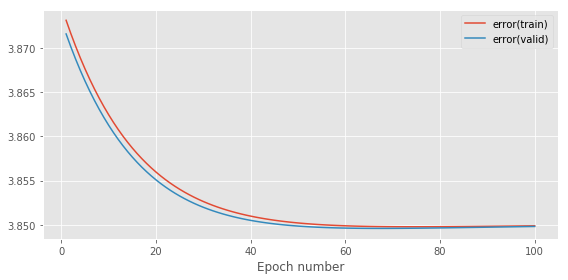

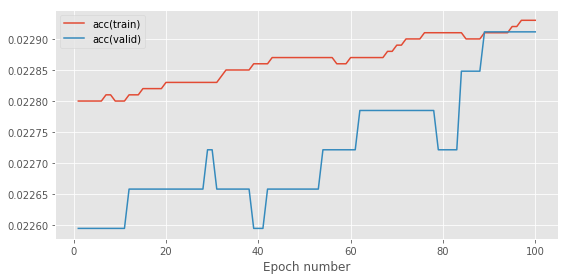

    final error(train) = 3.85e+00
    final error(valid) = 3.85e+00
    final acc(train)   = 2.29e-02
    final acc(valid)   = 2.29e-02
    run time per epoch = 10.64


Epoch 1: 6.5s to complete
    error(train)=3.90e+00, acc(train)=2.48e-02, error(valid)=3.90e+00, acc(valid)=2.42e-02


Epoch 2: 9.2s to complete
    error(train)=3.90e+00, acc(train)=2.48e-02, error(valid)=3.90e+00, acc(valid)=2.42e-02


Epoch 3: 7.7s to complete
    error(train)=3.90e+00, acc(train)=2.48e-02, error(valid)=3.90e+00, acc(valid)=2.42e-02


Epoch 4: 6.6s to complete
    error(train)=3.89e+00, acc(train)=2.48e-02, error(valid)=3.90e+00, acc(valid)=2.42e-02


Epoch 5: 7.2s to complete
    error(train)=3.89e+00, acc(train)=2.48e-02, error(valid)=3.90e+00, acc(valid)=2.42e-02


Epoch 6: 6.3s to complete
    error(train)=3.89e+00, acc(train)=2.48e-02, error(valid)=3.89e+00, acc(valid)=2.42e-02


Epoch 7: 7.8s to complete
    error(train)=3.89e+00, acc(train)=2.48e-02, error(valid)=3.89e+00, acc(valid)=2.42e-02


Epoch 8: 6.9s to complete
    error(train)=3.89e+00, acc(train)=2.48e-02, error(valid)=3.89e+00, acc(valid)=2.42e-02


Epoch 9: 7.4s to complete
    error(train)=3.89e+00, acc(train)=2.48e-02, error(valid)=3.89e+00, acc(valid)=2.42e-02


Epoch 10: 9.0s to complete
    error(train)=3.89e+00, acc(train)=2.48e-02, error(valid)=3.89e+00, acc(valid)=2.42e-02


Epoch 11: 7.7s to complete
    error(train)=3.88e+00, acc(train)=2.48e-02, error(valid)=3.89e+00, acc(valid)=2.42e-02


Epoch 12: 7.6s to complete
    error(train)=3.88e+00, acc(train)=2.48e-02, error(valid)=3.89e+00, acc(valid)=2.42e-02


Epoch 13: 8.1s to complete
    error(train)=3.88e+00, acc(train)=2.48e-02, error(valid)=3.88e+00, acc(valid)=2.42e-02


Epoch 14: 7.4s to complete
    error(train)=3.88e+00, acc(train)=2.48e-02, error(valid)=3.88e+00, acc(valid)=2.42e-02


Epoch 15: 7.5s to complete
    error(train)=3.88e+00, acc(train)=2.48e-02, error(valid)=3.88e+00, acc(valid)=2.42e-02


Epoch 16: 10.4s to complete
    error(train)=3.88e+00, acc(train)=2.48e-02, error(valid)=3.88e+00, acc(valid)=2.42e-02


Epoch 17: 9.4s to complete
    error(train)=3.88e+00, acc(train)=2.48e-02, error(valid)=3.88e+00, acc(valid)=2.42e-02


Epoch 18: 8.8s to complete
    error(train)=3.88e+00, acc(train)=2.48e-02, error(valid)=3.88e+00, acc(valid)=2.42e-02


Epoch 19: 10.4s to complete
    error(train)=3.87e+00, acc(train)=2.48e-02, error(valid)=3.88e+00, acc(valid)=2.42e-02


Epoch 20: 8.4s to complete
    error(train)=3.87e+00, acc(train)=2.48e-02, error(valid)=3.88e+00, acc(valid)=2.42e-02


Epoch 21: 8.2s to complete
    error(train)=3.87e+00, acc(train)=2.48e-02, error(valid)=3.88e+00, acc(valid)=2.42e-02


Epoch 22: 7.8s to complete
    error(train)=3.87e+00, acc(train)=2.48e-02, error(valid)=3.87e+00, acc(valid)=2.42e-02


Epoch 23: 6.7s to complete
    error(train)=3.87e+00, acc(train)=2.48e-02, error(valid)=3.87e+00, acc(valid)=2.42e-02


Epoch 24: 6.2s to complete
    error(train)=3.87e+00, acc(train)=2.48e-02, error(valid)=3.87e+00, acc(valid)=2.42e-02


Epoch 25: 7.3s to complete
    error(train)=3.87e+00, acc(train)=2.48e-02, error(valid)=3.87e+00, acc(valid)=2.42e-02


Epoch 26: 6.8s to complete
    error(train)=3.87e+00, acc(train)=2.48e-02, error(valid)=3.87e+00, acc(valid)=2.42e-02


Epoch 27: 6.4s to complete
    error(train)=3.87e+00, acc(train)=2.48e-02, error(valid)=3.87e+00, acc(valid)=2.42e-02


Epoch 28: 6.5s to complete
    error(train)=3.87e+00, acc(train)=2.48e-02, error(valid)=3.87e+00, acc(valid)=2.42e-02


Epoch 29: 6.7s to complete
    error(train)=3.87e+00, acc(train)=2.48e-02, error(valid)=3.87e+00, acc(valid)=2.42e-02


Epoch 30: 6.7s to complete
    error(train)=3.87e+00, acc(train)=2.48e-02, error(valid)=3.87e+00, acc(valid)=2.42e-02


Epoch 31: 7.5s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.87e+00, acc(valid)=2.42e-02


Epoch 32: 6.8s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.87e+00, acc(valid)=2.42e-02


Epoch 33: 7.1s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.87e+00, acc(valid)=2.42e-02


Epoch 34: 6.5s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 35: 6.5s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 36: 6.7s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 37: 6.4s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 38: 7.0s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 39: 7.9s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 40: 6.2s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 41: 8.1s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 42: 7.4s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 43: 5.7s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 44: 5.7s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 45: 6.1s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 46: 8.2s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 47: 17.8s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 48: 9.1s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 49: 8.8s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 50: 10.1s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 51: 11.4s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 52: 8.1s to complete
    error(train)=3.86e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 53: 7.1s to complete
    error(train)=3.85e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 54: 11.5s to complete
    error(train)=3.85e+00, acc(train)=2.49e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 55: 7.4s to complete
    error(train)=3.85e+00, acc(train)=2.48e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 56: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.49e-02, error(valid)=3.86e+00, acc(valid)=2.42e-02


Epoch 57: 6.1s to complete
    error(train)=3.85e+00, acc(train)=2.49e-02, error(valid)=3.85e+00, acc(valid)=2.42e-02


Epoch 58: 7.3s to complete
    error(train)=3.85e+00, acc(train)=2.49e-02, error(valid)=3.85e+00, acc(valid)=2.42e-02


Epoch 59: 7.1s to complete
    error(train)=3.85e+00, acc(train)=2.49e-02, error(valid)=3.85e+00, acc(valid)=2.42e-02


Epoch 60: 6.9s to complete
    error(train)=3.85e+00, acc(train)=2.48e-02, error(valid)=3.85e+00, acc(valid)=2.42e-02


Epoch 61: 6.0s to complete
    error(train)=3.85e+00, acc(train)=2.49e-02, error(valid)=3.85e+00, acc(valid)=2.42e-02


Epoch 62: 7.1s to complete
    error(train)=3.85e+00, acc(train)=2.47e-02, error(valid)=3.85e+00, acc(valid)=2.43e-02


Epoch 63: 7.2s to complete
    error(train)=3.85e+00, acc(train)=2.44e-02, error(valid)=3.85e+00, acc(valid)=2.38e-02


Epoch 64: 8.0s to complete
    error(train)=3.85e+00, acc(train)=2.42e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


Epoch 65: 9.3s to complete
    error(train)=3.85e+00, acc(train)=2.40e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


Epoch 66: 7.9s to complete
    error(train)=3.85e+00, acc(train)=2.40e-02, error(valid)=3.85e+00, acc(valid)=2.40e-02


Epoch 67: 7.8s to complete
    error(train)=3.85e+00, acc(train)=2.41e-02, error(valid)=3.85e+00, acc(valid)=2.42e-02


Epoch 68: 9.5s to complete
    error(train)=3.85e+00, acc(train)=2.39e-02, error(valid)=3.85e+00, acc(valid)=2.41e-02


Epoch 69: 6.9s to complete
    error(train)=3.85e+00, acc(train)=2.37e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


Epoch 70: 7.5s to complete
    error(train)=3.85e+00, acc(train)=2.37e-02, error(valid)=3.85e+00, acc(valid)=2.39e-02


Epoch 71: 7.5s to complete
    error(train)=3.85e+00, acc(train)=2.36e-02, error(valid)=3.85e+00, acc(valid)=2.38e-02


Epoch 72: 6.6s to complete
    error(train)=3.85e+00, acc(train)=2.35e-02, error(valid)=3.85e+00, acc(valid)=2.35e-02


Epoch 73: 15.9s to complete
    error(train)=3.85e+00, acc(train)=2.35e-02, error(valid)=3.85e+00, acc(valid)=2.35e-02


Epoch 74: 7.2s to complete
    error(train)=3.85e+00, acc(train)=2.35e-02, error(valid)=3.85e+00, acc(valid)=2.36e-02


Epoch 75: 7.8s to complete
    error(train)=3.85e+00, acc(train)=2.35e-02, error(valid)=3.85e+00, acc(valid)=2.37e-02


Epoch 76: 9.8s to complete
    error(train)=3.85e+00, acc(train)=2.36e-02, error(valid)=3.85e+00, acc(valid)=2.35e-02


Epoch 77: 7.4s to complete
    error(train)=3.85e+00, acc(train)=2.35e-02, error(valid)=3.85e+00, acc(valid)=2.36e-02


Epoch 78: 9.0s to complete
    error(train)=3.85e+00, acc(train)=2.35e-02, error(valid)=3.85e+00, acc(valid)=2.35e-02


Epoch 79: 7.8s to complete
    error(train)=3.85e+00, acc(train)=2.34e-02, error(valid)=3.85e+00, acc(valid)=2.35e-02


Epoch 80: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.34e-02, error(valid)=3.85e+00, acc(valid)=2.34e-02


Epoch 81: 6.2s to complete
    error(train)=3.85e+00, acc(train)=2.33e-02, error(valid)=3.85e+00, acc(valid)=2.35e-02


Epoch 82: 9.4s to complete
    error(train)=3.84e+00, acc(train)=2.33e-02, error(valid)=3.85e+00, acc(valid)=2.35e-02


Epoch 83: 7.9s to complete
    error(train)=3.84e+00, acc(train)=2.33e-02, error(valid)=3.85e+00, acc(valid)=2.33e-02


Epoch 84: 7.8s to complete
    error(train)=3.84e+00, acc(train)=2.32e-02, error(valid)=3.85e+00, acc(valid)=2.32e-02


Epoch 85: 9.0s to complete
    error(train)=3.84e+00, acc(train)=2.32e-02, error(valid)=3.85e+00, acc(valid)=2.32e-02


Epoch 86: 6.9s to complete
    error(train)=3.84e+00, acc(train)=2.32e-02, error(valid)=3.85e+00, acc(valid)=2.32e-02


Epoch 87: 6.6s to complete
    error(train)=3.84e+00, acc(train)=2.32e-02, error(valid)=3.85e+00, acc(valid)=2.30e-02


Epoch 88: 6.9s to complete
    error(train)=3.84e+00, acc(train)=2.32e-02, error(valid)=3.84e+00, acc(valid)=2.30e-02


Epoch 89: 7.6s to complete
    error(train)=3.84e+00, acc(train)=2.31e-02, error(valid)=3.84e+00, acc(valid)=2.29e-02


Epoch 90: 8.3s to complete
    error(train)=3.84e+00, acc(train)=2.31e-02, error(valid)=3.84e+00, acc(valid)=2.28e-02


Epoch 91: 7.4s to complete
    error(train)=3.84e+00, acc(train)=2.31e-02, error(valid)=3.84e+00, acc(valid)=2.28e-02


Epoch 92: 10.0s to complete
    error(train)=3.84e+00, acc(train)=2.31e-02, error(valid)=3.84e+00, acc(valid)=2.27e-02


Epoch 93: 9.4s to complete
    error(train)=3.84e+00, acc(train)=2.31e-02, error(valid)=3.84e+00, acc(valid)=2.27e-02


Epoch 94: 8.4s to complete
    error(train)=3.84e+00, acc(train)=2.30e-02, error(valid)=3.84e+00, acc(valid)=2.28e-02


Epoch 95: 8.5s to complete
    error(train)=3.84e+00, acc(train)=2.30e-02, error(valid)=3.84e+00, acc(valid)=2.27e-02


Epoch 96: 8.6s to complete
    error(train)=3.84e+00, acc(train)=2.30e-02, error(valid)=3.84e+00, acc(valid)=2.27e-02


Epoch 97: 7.7s to complete
    error(train)=3.84e+00, acc(train)=2.30e-02, error(valid)=3.84e+00, acc(valid)=2.27e-02


Epoch 98: 7.0s to complete
    error(train)=3.84e+00, acc(train)=2.30e-02, error(valid)=3.84e+00, acc(valid)=2.27e-02


Epoch 99: 6.9s to complete
    error(train)=3.84e+00, acc(train)=2.30e-02, error(valid)=3.84e+00, acc(valid)=2.27e-02


Epoch 100: 7.6s to complete
    error(train)=3.84e+00, acc(train)=2.29e-02, error(valid)=3.84e+00, acc(valid)=2.27e-02



--------------------------------------------------------------------------------
weight_decay=0.00
--------------------------------------------------------------------------------


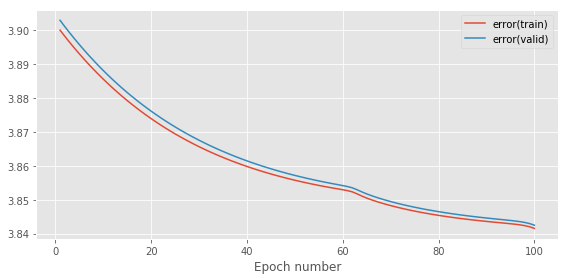

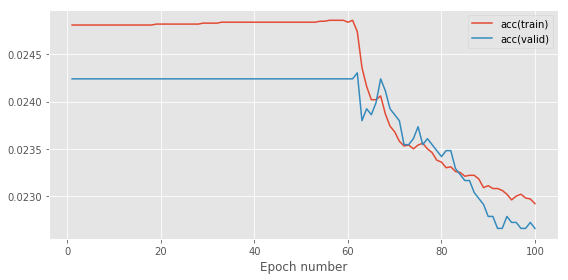

    final error(train) = 3.84e+00
    final error(valid) = 3.84e+00
    final acc(train)   = 2.29e-02
    final acc(valid)   = 2.27e-02
    run time per epoch = 10.22


In [6]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

#setup hyperparameters
weight_decays = [5e-5, 1e-5, 5e-6]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
learning_rate = 1e-4

for weight_decay in weight_decays:

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    scheduler = ConstantLearningRateScheduler(learning_rate)

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRuleWithWeightDecay(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, weight_decay=weight_decay)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True)

    fig_1.tight_layout()
    fig_1_name = "adam_w_fig_1_" + str(learning_rate) + ".pdf"
    fig_1.savefig(fig_1_name)

    fig_2.tight_layout()
    fig_2_name = "adam_w_fig_2_" + str(learning_rate) + ".pdf"
    fig_2.savefig(fig_2_name)

    print('-' * 80)
    print('weight_decay={0:.2f}'
          .format(weight_decay))
    print('-' * 80)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))
    